# Code Abstract:
import cv2

image=cv2.imread(my_image)

type(image):numpy.ndarray

image.shape:(512,512,3)

import matplotlib.pyplot as plt

plt.imshow(image) 

*-change the color space with convertion code*

*-The color orders of OpenCV(BGR) and Pillow(RGB) are different.*

new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(new_image)

*-convert image to greyscale:*

image_grey=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.imshow(image_grey)

cv2.imwrite('Doris_Wang_cv.jpg',image_grey)

im_gray=cv2.imread('barbara.png',cv2.IMREAD_GRAYSCALE) 
*-specify the color code for imread color scale*

*-use slices for getting different color channels*

baboon=cv2.imread('baboon.png')

blue,green,red=baboon[:,:,0],baboon[:,:,1],baboon[:,:,2] *-the final index state the color channel*

**For more**:https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

In [1]:
#Download Files from lab:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

--2022-08-17 11:28:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 637192 (622K) [image/png]
Saving to: ‘baboon.png’

baboon.png          100%[===================>] 622.26K  3.55MB/s    in 0.2s    

2022-08-17 11:28:42 (3.55 MB/s) - ‘baboon.png’ saved [637192/637192]

--2022-08-17 11:28:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-c

In [2]:
#concatenate two images side by side
def get_concat_h(im1, im2):
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [ ]:
#code model for images merging:
def merge(im1, im2):
    w = im1.size[0] + im2.size[0] 
    h = max(im1.size[1], im2.size[1])
    im = Image.new("RGBA", (w, h))

    im.paste(im1)
    im.paste(im2, (im1.size[0], 0)) #value 0 means that the pasted image is completely transparent.

    return im

# Image Files and Path

In [3]:
my_image = "Doris_Wang_2.png"

In [4]:
import os
cwd = os.getcwd()
cwd 

'/content'

In [5]:
image_path = os.path.join(cwd, my_image)
image_path

'/content/Doris_Wang_2.png'

# Load in Image in Python

In [6]:
import cv2
image = cv2.imread(my_image)

In [7]:
type(image)

numpy.ndarray

In [8]:
image.shape #(B, G, R) format, ranging from 0~255 for intensity

(1734, 923, 3)

In [10]:
image.max(),    image.min()

(255, 15)

# Plotting an Image

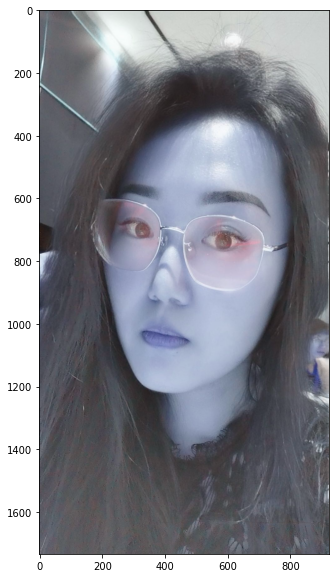

In [11]:
#load image with matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

- The image output doesn't look natural owing to the order of **RGB Channels** are different. 
- We can change the color space with `conversion code` and the `function cvtColor` from the cv2 library

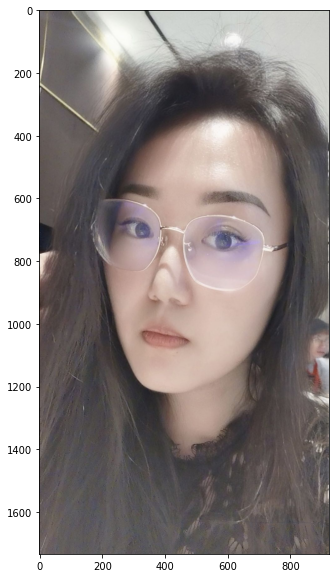

In [12]:
#convert RGB to BGR
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(new_image)
plt.show()

In [17]:
#load image with path method
image = cv2.imread(image_path)
image.shape

(1734, 923, 3)

In [15]:
#save the image as in jpg format
cv2.imwrite("Doris_Wang_2.jpg", image)

True

- **Grayscale Images**:
 - pixel values representing the amount of *light or intensity.*
 - light shades of gray have a high-intensity darker shades have a lower intensity. 
 - use `cv2.COLOR_BGR2GRAY` function to convert into greyscale image


In [20]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [21]:
image_gray.shape

(1734, 923)

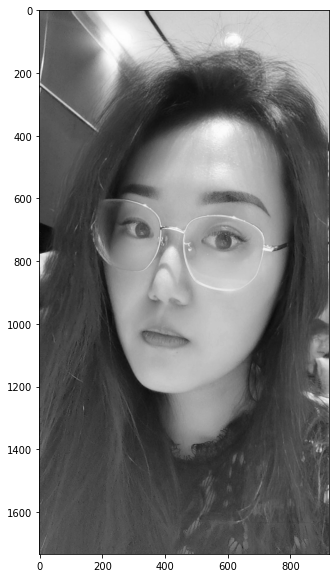

In [22]:
plt.figure(figsize=(10, 10))
plt.imshow(image_gray, cmap='gray') #we need to declare color map as grey.
plt.show()

In [23]:
#save the grey image
cv2.imwrite('DW2_gray_cv.jpg', image_gray)

True

In [24]:
#have to set flag parameter to gray color conversation code: cv2.COLOR_BGR2GRAY
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)

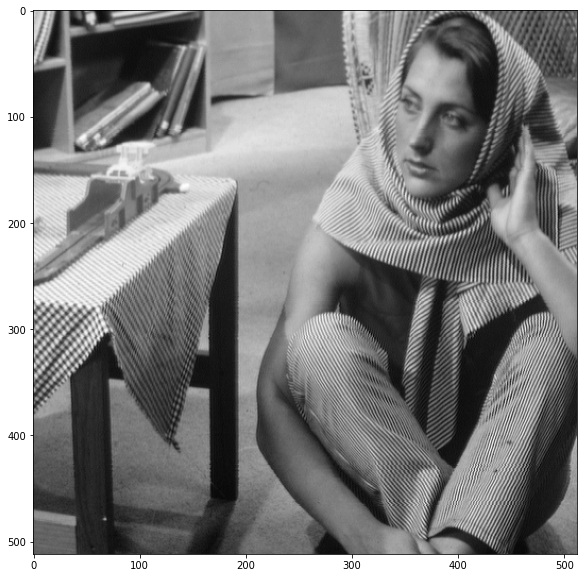

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(im_gray,cmap='gray')
plt.show()

- Color Channels

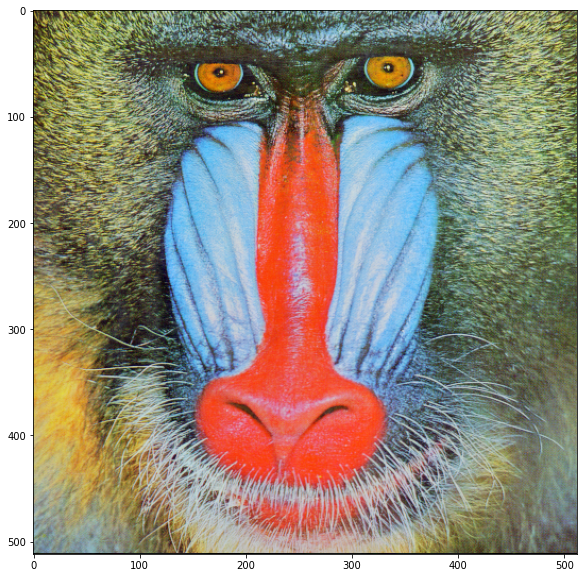

In [26]:
baboon=cv2.imread('baboon.png')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

In [27]:
#obtain the different RGB colors and assign them to the variables blue, green, and red, in (B, G, R) format.
blue, green, red = baboon[:, :, 0], baboon[:, :, 1], baboon[:, :, 2]

In [28]:
#concatenate each image channel the images
im_bgr = cv2.vconcat([blue, green, red])

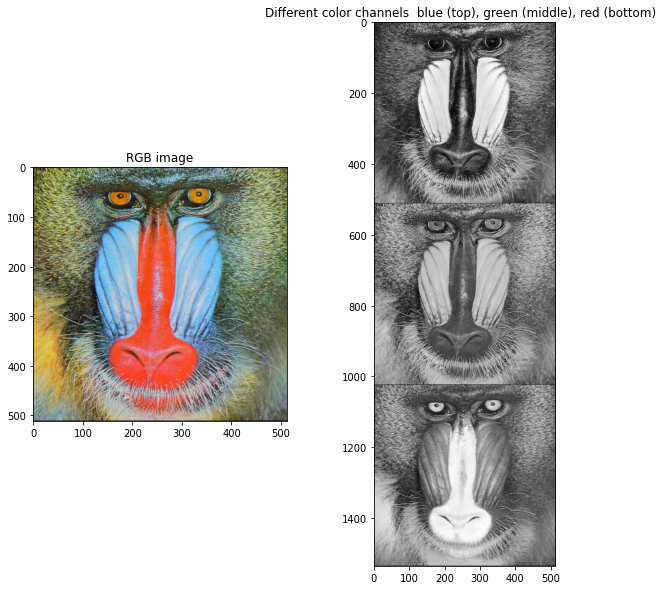

In [29]:
#Plotting the color image next to the red channel in grayscale
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("RGB image")

plt.subplot(122)
plt.imshow(im_bgr,cmap='gray')
plt.title("Different color channels  blue (top), green (middle), red (bottom)  ")
plt.show()

- Indexing

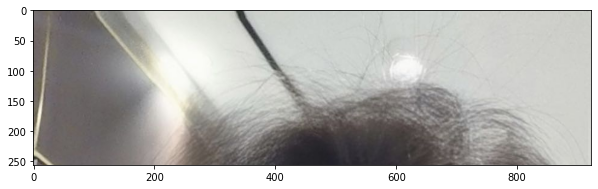

In [30]:
rows = 256
plt.figure(figsize=(10,10))
plt.imshow(new_image[0:rows,:,:])
plt.show() #return the first 256 rows corresponding to the top half of the imag

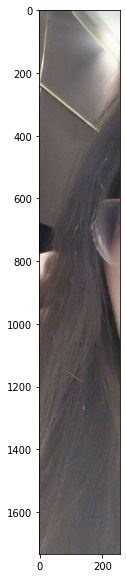

In [31]:
columns = 256
plt.figure(figsize=(10,10))
plt.imshow(new_image[:,0:columns,:])
plt.show()

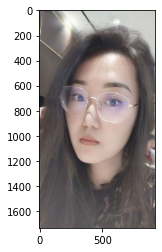

In [32]:
A = new_image.copy()
plt.imshow(A)
plt.show()

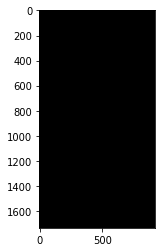

In [33]:
B = A
A[:,:,:] = 0
plt.imshow(B)
plt.show()

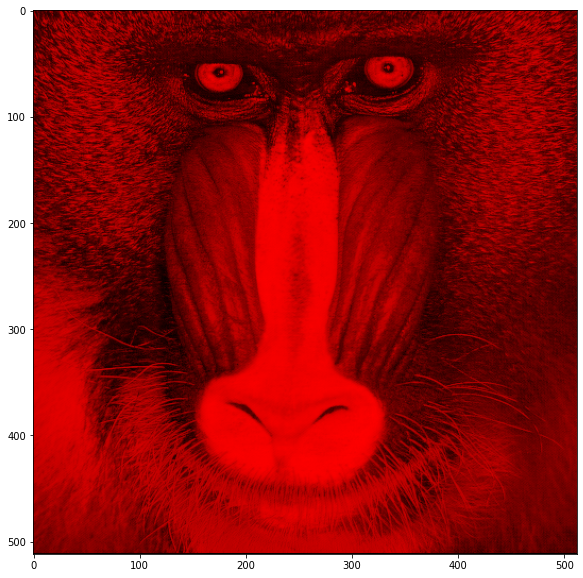

In [34]:
#manipulate elements using indexing
baboon_red = baboon.copy() #create a new array 
#set all but the red color channels to zero.
baboon_red[:, :, 0] = 0
baboon_red[:, :, 1] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2RGB))
plt.show()

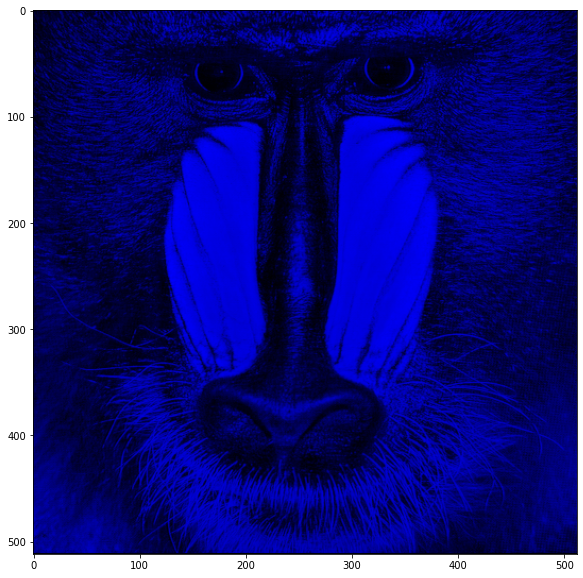

In [35]:
#Blue
baboon_blue = baboon.copy()
baboon_blue[:, :, 1] = 0
baboon_blue[:, :, 2] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()

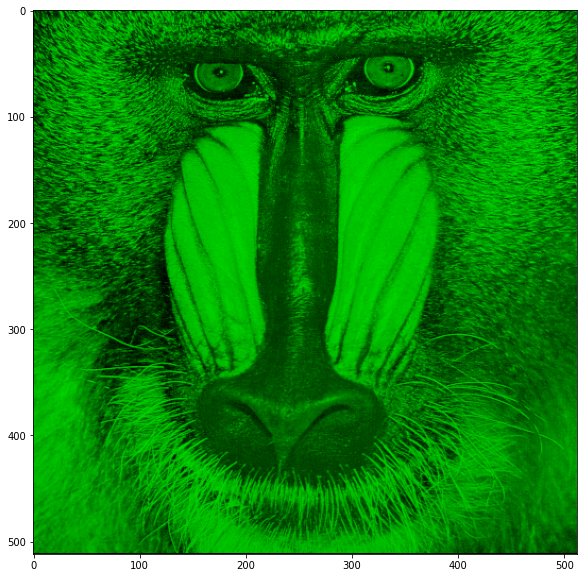

In [36]:
#Green
baboon_green = baboon.copy()
baboon_green[:, :, 0] = 0
baboon_green[:, :, 2] = 0
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon_green, cv2.COLOR_BGR2RGB))
plt.show()